In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from IPython.display import Image
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Carga y anlaisis de Datos

In [3]:
df = pd.read_csv('Mall_customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.shape

(200, 5)

# Distribucion de Datos

In [7]:
df = df.iloc[:, [3,4]].values

In [8]:
df

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

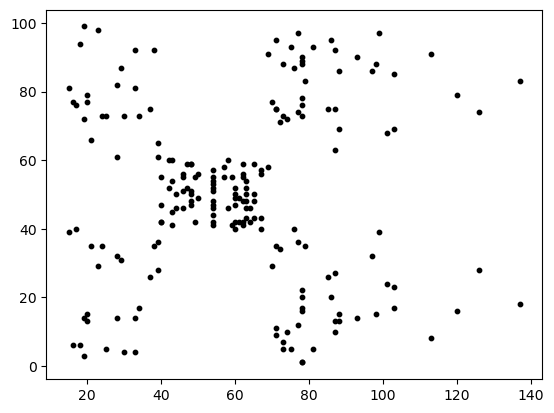

In [9]:
plt.scatter(df[:, 0], df[:,1], s=10, c="black")

# Fase de Analisis con Kmeans
<p>Basicamente se usara K means para obtener la grafica en la cual se identificara el numero optimo de clusters del dataframe</p>

In [10]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

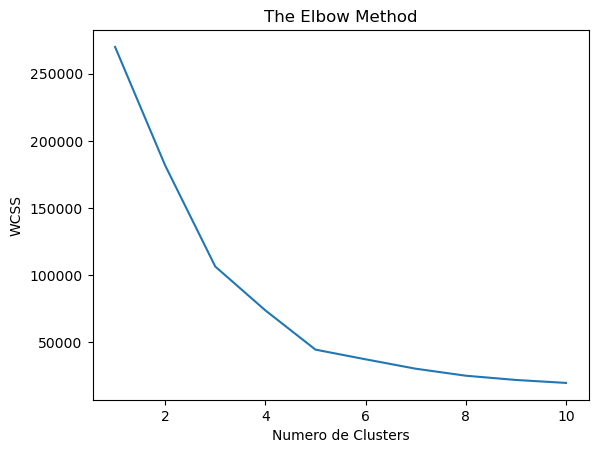

In [11]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Numero de Clusters")
plt.ylabel("WCSS")


<p>En base a esto, se puede decir que el numero optimo de clusters es de 5</p>

# Fase de DBSCAN

In [12]:
dbscan = DBSCAN(eps = 5, min_samples=5)

<p>eps: radio máximo de la vecindad</p>
<p>min_samples: número mínimo de puntos que se necesitan para formar un grupo denso. </p>

In [13]:
labels = dbscan.fit_predict(df)

In [14]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Ejecucion de DBSCAN y guardar imagenes para gif

In [17]:
images = []

# Ejecutamos el algoritmo DBSCAN varias veces, cada vez con un número de iteraciones incremental.
# Con cada iteración, capturamos la posición de los centroides y las asignaciones de los puntos.
for eps in np.linspace(0.05, 0.5, num=20):
    # Creamos una instancia de DBSCAN
    # y especificamos el número de iteraciones para la convergencia del algoritmo.
    dbscan = DBSCAN(eps=eps, min_samples=10)
    clusters = dbscan.fit_predict(X_scaled)  # Ajustamos el modelo a los datos generados

    # Creamos una figura para visualizar los clusters
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(f'Clustering con DBSCAN (eps={eps:.2f})')
    ax.scatter(df[:, 0], df[:, 1], c=clusters, cmap='viridis', s=50)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Guardamos cada figura como una imagen PNG
    filename = f'dbscan_eps_{eps:.2f}.png'
    fig.savefig(filename)
    plt.close(fig)  
    images.append(imageio.imread(filename))  # Añadimos la imagen a la lista para el GIF

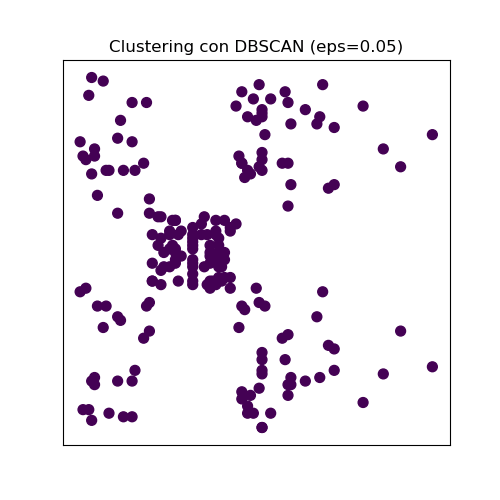

In [18]:
# Guardar las imágenes como un GIF animado
imageio.mimsave('dbscan_iterations.gif', images, fps=1)

# Mostrar el GIF resultante en el Jupyter Notebook
Image(filename='dbscan_iterations.gif')

# Matriz de Imagenes para DBSCAN
<p>Se usara un arreglo de eps y min samples para graficar los resultados de dbscan y con ello poder obtener una mejor comprension de los clusters cuando van cambiando estos valores</p>

## Cargar datos

In [19]:
df = pd.read_csv('Mall_customers.csv')
X = df.iloc[:, [3, 4]].values  # Seleccionar las columnas 'Annual Income' y 'Spending Score'

## Escalar los datos

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Definicion de diferentes valores para eps y min_samples

In [25]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [3, 5, 7, 10,15]

## Implementacion de DBSCAN

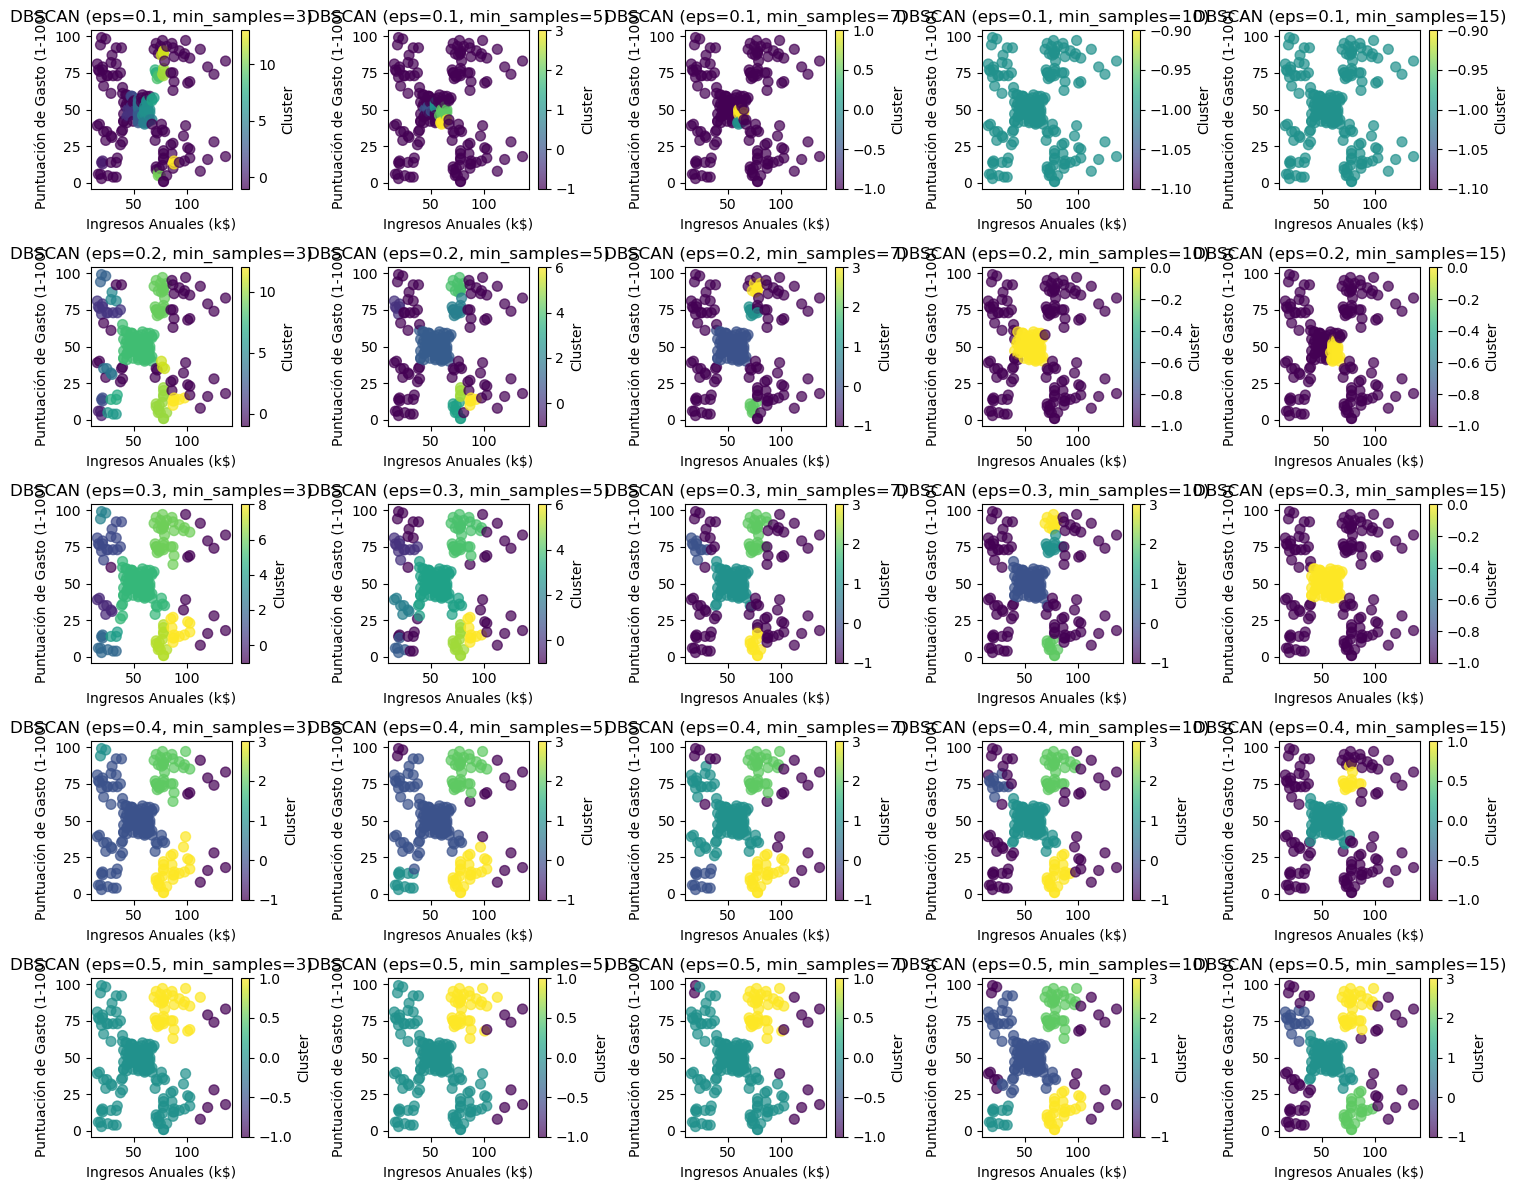

In [26]:
# Se define el tamaño de la figura donde se guardaran las imagenes obtenidas
plt.figure(figsize=(15, 12))
plot_index = 1

for eps in eps_values:
    for min_samples in min_samples_values:
        # Se crea la instancia de DBSCAN y se ajusta el modelo
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        # Visualizar los clusters encontrados
        plt.subplot(len(eps_values), len(min_samples_values), plot_index)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
        plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
        plt.xlabel('Ingresos Anuales (k$)')
        plt.ylabel('Puntuación de Gasto (1-100)')
        plt.colorbar(label='Cluster')
        
        plot_index += 1

plt.tight_layout()
plt.show()

<p>Como se puede apreciar en las imagenes, cuando min_samples =3, mientras mas sube eps, se tendra un sobreajujste, en el cual un cluster se apoderara de todos los datos, lo mismo va pasando en los casos en que min_samples es 5 y 7</p>
<p>Cuando min_samples es 10 o 15, se puede decir que es optimo, ya que se puede apreciar con mas claridad la diferenciacion entre los clusters, y donde se ubican estos. Siempre y cuando eps=0.5</p>
<p>La diferencia entre utilizar DBSCAN con min_samples igual a 10 o 15 se refleja en la aparición del cluster de color morado. En la última iteración del algoritmo DBSCAN con min_samples=15, se observa una distribución más clara del cluster morado, el cual se extiende hacia las esquinas del gráfico.</p>